# Molten-Cores

#### Team Members: Arrisa, Evan, Maulika, Rafail, Sophia

![img_happy](https://www.georgetownbehavioral.com/sites/default/files/georgetown-suicide-awareness.jpg)



## EDA: 

## Cleanup



In [3]:
import pandas as pd
import plotly.figure_factory as ff
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
suicide_risk = pd.read_csv("foreveralone.csv")

In [25]:
suicide_risk.shape

(469, 19)

In [21]:
list(suicide_risk.columns)

['time',
 'gender',
 'sexuallity',
 'age',
 'income',
 'race',
 'bodyweight',
 'virgin',
 'prostitution_legal',
 'pay_for_sex',
 'friends',
 'social_fear',
 'depressed',
 'what_help_from_others',
 'attempt_suicide',
 'employment',
 'job_title',
 'edu_level',
 'improve_yourself_how']

In [23]:
for item in list(suicide_risk.columns):
    print(suicide_risk[item].value_counts())

5/18/2016 7:41:18     2
5/17/2016 20:04:18    1
5/18/2016 17:26:15    1
5/18/2016 18:44:01    1
5/18/2016 18:32:30    1
                     ..
5/18/2016 3:06:44     1
5/18/2016 3:06:09     1
5/18/2016 3:04:00     1
5/18/2016 2:58:31     1
9/4/2016 23:10:04     1
Name: time, Length: 468, dtype: int64
Male                  393
Female                 73
Transgender male        2
Transgender female      1
Name: gender, dtype: int64
Straight       415
Bisexual        46
Gay/Lesbian      8
Name: sexuallity, dtype: int64
23    46
21    41
22    40
20    39
18    39
24    37
19    32
25    30
26    26
28    21
30    16
27    15
29    14
17    13
31    10
33     6
35     6
32     5
16     5
15     4
38     4
34     3
12     2
36     2
37     2
39     2
70     1
45     1
55     1
57     1
44     1
41     1
14     1
48     1
42     1
Name: age, dtype: int64
$0                      160
$1 to $10,000           100
$10,000 to $19,999       58
$20,000 to $29,999       44
$30,000 to $39,999       39


In [75]:
suicide_risk[suicide_risk["employment"].isin(["A homemaker"])]["employment"] = suicide_risk[suicide_risk["employment"].isin(["A homemaker"])]["employment"]

272    A homemaker
286    A homemaker
421    A homemaker
Name: employment, dtype: object

### Rafael



In [7]:
suicide_risk["income"].value_counts()

$0                      160
$1 to $10,000           100
$10,000 to $19,999       58
$20,000 to $29,999       44
$30,000 to $39,999       39
$50,000 to $74,999       28
$40,000 to $49,999       16
$75,000 to $99,999        9
$125,000 to $149,999      6
$100,000 to $124,999      3
$150,000 to $174,999      2
$174,999 to $199,999      2
$200,000 or more          2
Name: income, dtype: int64

In [8]:
[x]

NameError: name 'x' is not defined

In [0]:
# x = px.histogram(suicide_risk, x = 'age', y= 'income')

hist_data = suicide_risk[["age","income"]]

group_labels = ['age', 'income']

fig_risk = ff.create_distplot(hist_data, group_labels, bin_size=[.1, .25])
fig_risk.show()

In [0]:
suicide_risk.head(10)

In [0]:
fig = px.bar(suicide_risk , x = "edu_level", y = ["$0", "$1 to $10,000", "$20,000 to $29,999", "$30,000 to $39,999", "$40,000 to $49,999", "$50,000 to $74,999", "$75,000 to $99,999", "$125,000 to $149,999", "$150,000 to $174,999", "$174,999 to $199,999" ] , color = "edu_level")
fig.show()

In [0]:
#3D graph and color pallete

px.scatter_3d(suicide_risk, x = 'age', y = 'depressed', z = 'attempt_suicide', color = 'attempt_suicide',)

# Sophia



In [0]:
suicide_risk["attempt_suicide"].value_counts()

In [0]:
# sophia's bar chart
fig = px.bar(suicide_risk, x = "gender", y = "age", color = "attempt_suicide")
fig.show()

In [0]:
fig = px.bar(suicide_risk, x = "Sexuality", y = "", color = "attempt_suicide")
fig.show()

# Arrisa



#### Whatever!



In [11]:

# import pandas as pd
# suicide_risk = pd.read_csv("https://www.kaggle.com/code/antonaks/suicide-attempt-prediction-foreveralone-dataset/data")
suicide_risk.head()

,time,gender,sexuallity,age,income,race,bodyweight,virgin,prostitution_legal,pay_for_sex,friends,social_fear,depressed,what_help_from_others,attempt_suicide,employment,job_title,edu_level,improve_yourself_how
0,5/17/2016 20:04:18,Male,Straight,35,"$30,000 to $39,999",White non-Hispanic,Normal weight,Yes,No,No,0.0,Yes,Yes,"wingman/wingwoman, Set me up with a date",Yes,Employed for wages,mechanical drafter,Associate degree,None
1,5/17/2016 20:04:30,Male,Bisexual,21,"$1 to $10,000",White non-Hispanic,Underweight,Yes,No,No,0.0,Yes,Yes,"wingman/wingwoman, Set me up with a date, date...",No,Out of work and looking for work,-,"Some college, no degree",join clubs/socual clubs/meet ups
2,5/17/2016 20:04:58,Male,Straight,22,$0,White non-Hispanic,Overweight,Yes,No,No,10.0,Yes,Yes,I don't want help,No,Out of work but not currently looking for work,unemployed,"Some college, no degree",Other exercise
3,5/17/2016 20:08:01,Male,Straight,19,"$1 to $10,000",White non-Hispanic,Overweight,Yes,Yes,No,8.0,Yes,Yes,date coaching,No,A student,student,"Some college, no degree",Joined a gym/go to the gym
4,5/17/2016 20:08:04,Male,Straight,23,"$30,000 to $39,999",White non-Hispanic,Overweight,No,No,Yes and I have,10.0,No,Yes,I don't want help,No,Employed for wages,Factory worker,"High school graduate, diploma or the equivalen...",None


In [0]:
plt.figure(figsize=(30,10))
plt.bar('race', 'income', data = suicide_risk)
plt.title('race Vs Income', size = 18)
plt.xlabel('race', size = 16)
plt.ylabel('Income', size = 16)
plt.show()

In [0]:
# Bar chart for Age Race and Income and colour with Attempt to suicdide
#Distrubtuin chart : Box plot for the income or something else
# Bar chart for friens sexualatiy and attemp to suiicide

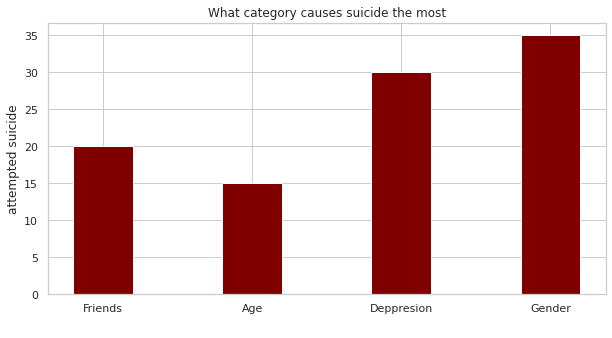

In [39]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = {'Friends':20, 'Age':15, 'Deppresion':30,
		'Gender':35}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='maroon',
		width = 0.4)

plt.xlabel(" ")
plt.ylabel("attempted suicide")
plt.title("What category causes suicide the most")
plt.show()

In [63]:
#NEW STUFF
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [54]:
data = pd.read_csv("foreveralone.csv", header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

(457, 19)
['time', 'gender', 'sexuallity', 'age', 'income', 'race', 'bodyweight', 'virgin', 'prostitution_legal', 'pay_for_sex', 'friends', 'social_fear', 'depressed', 'what_help_from_others', 'attempt_suicide', 'employment', 'job_title', 'edu_level', 'improve_yourself_how']


In [91]:
%matplotlib inline
pd.crosstab(data.suicide_risk, data.y).plot(kind = 'bar')
plt.title('race')
plt.xlabel('edu_level')
plt.ylabel('job_title')
plt.savefig('depressed')

AttributeError: 'DataFrame' object has no attribute 'suicide_risk'

# Maulika



In [6]:
# List of columns

suicide_risk.columns.tolist()

['time',
 'gender',
 'sexuallity',
 'age',
 'income',
 'race',
 'bodyweight',
 'virgin',
 'prostitution_legal',
 'pay_for_sex',
 'friends',
 'social_fear',
 'depressed',
 'what_help_from_others',
 'attempt_suicide',
 'employment',
 'job_title',
 'edu_level',
 'improve_yourself_how']

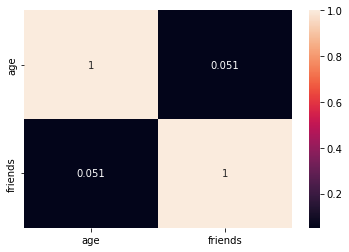

In [7]:
# Correlation Plot

mat = suicide_risk.corr()

import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(mat, annot=True)
plt.show()

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f416e4a5fa0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f416e4a5e80>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f416e4b9640>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f416e4b9a00>}

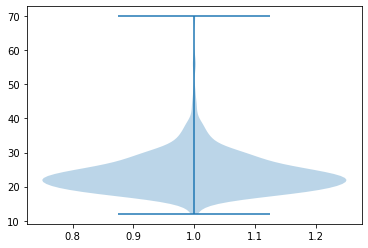

In [8]:
# Violin Plot for Score

plt.violinplot(suicide_risk['age'])

<AxesSubplot:>

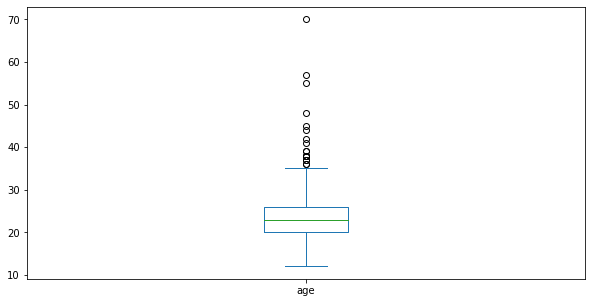

In [9]:
# Bar Plot

plt.figure(figsize=(10,5))
suicide_risk['age'].plot(kind='box')

<Figure size 720x720 with 0 Axes>

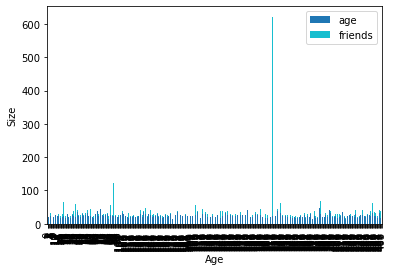

In [10]:
# Stacked Bar Chart
plt.figure(figsize=(10,10))
suicide_risk.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10')
plt.xlabel("Age")
plt.ylabel("Size")
plt.show()

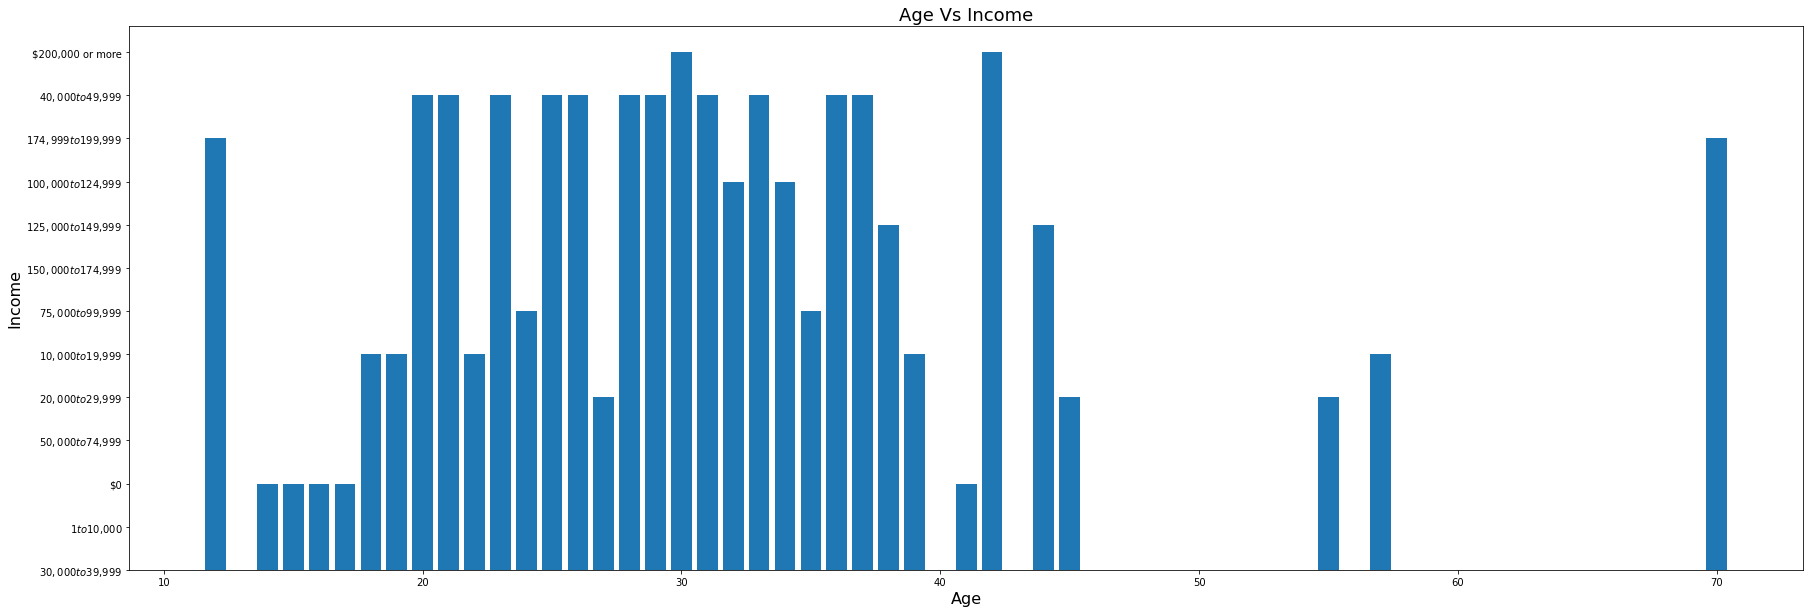

In [11]:
plt.figure(figsize=(30,10))
plt.bar('age', 'income', data = suicide_risk)
plt.title('Age Vs Income', size = 18)
plt.xlabel('Age', size = 16)
plt.ylabel('Income', size = 16)
plt.show()

<AxesSubplot:ylabel='age'>

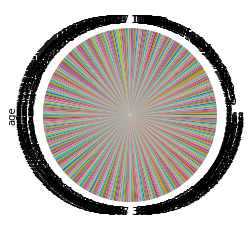

In [12]:
# Pie Chart

suicide_risk["age"].plot(kind="pie")

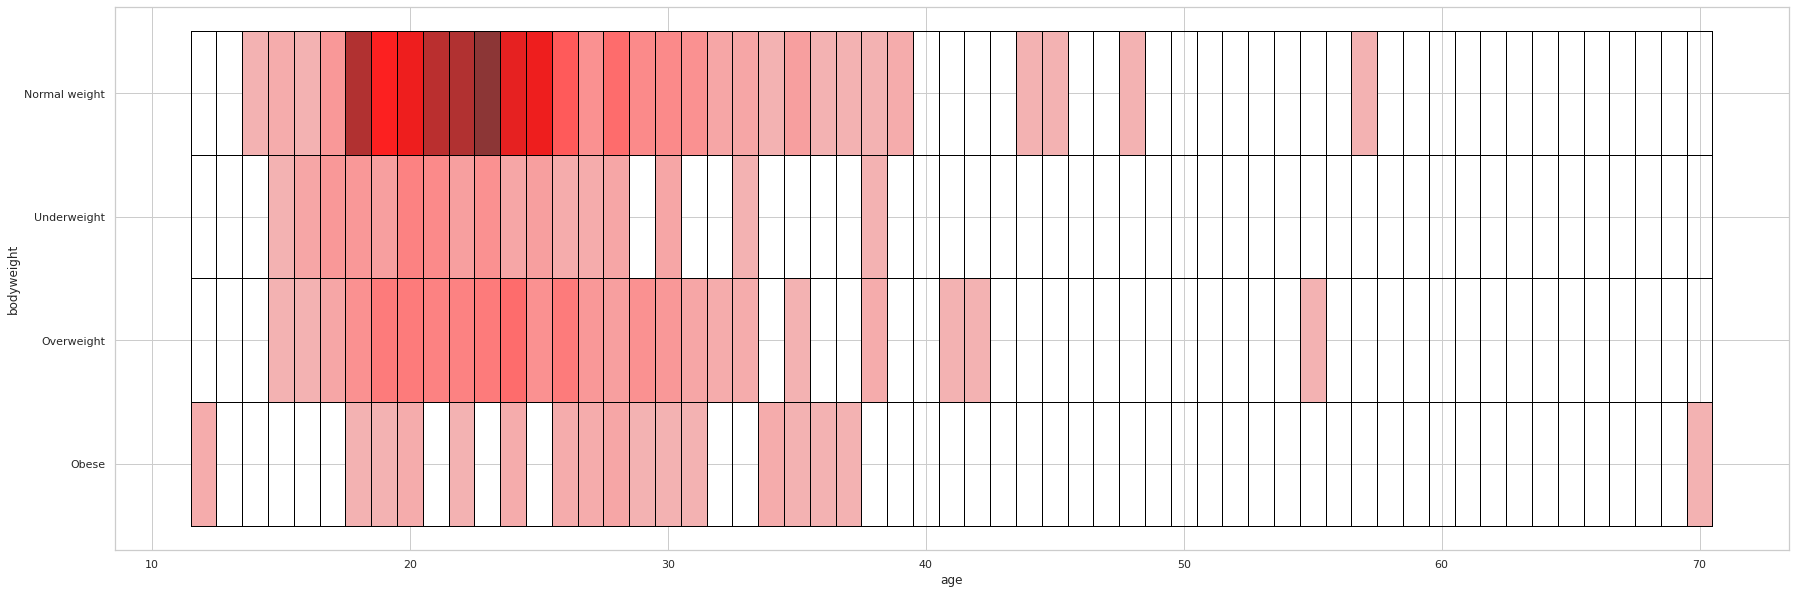

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30,10))
sns.histplot(x= 'age', y='bodyweight', data = suicide_risk, discrete = True,
             color = 'red', edgecolor = 'black',
             kde = True, kde_kws ={'cut': 2}, line_kws = {'linewidth': 4})
plt.show()

In [50]:
suicide_risk.head()

,gender,sexuallity,age,income,race,bodyweight,virgin,prostitution_legal,pay_for_sex,friends,social_fear,depressed,what_help_from_others,attempt_suicide,employment,job_title,edu_level,improve_yourself_how
0,Male,Straight,35,"$30,000 to $39,999",White non-Hispanic,Normal weight,Yes,No,No,0.0,Yes,Yes,"wingman/wingwoman, Set me up with a date",Yes,Employed for wages,mechanical drafter,Associate degree,None
1,Male,Bisexual,21,"$1 to $10,000",White non-Hispanic,Underweight,Yes,No,No,0.0,Yes,Yes,"wingman/wingwoman, Set me up with a date, date...",No,Out of work and looking for work,-,"Some college, no degree",join clubs/socual clubs/meet ups
2,Male,Straight,22,$0,White non-Hispanic,Overweight,Yes,No,No,10.0,Yes,Yes,I don't want help,No,Out of work but not currently looking for work,unemployed,"Some college, no degree",Other exercise
3,Male,Straight,19,"$1 to $10,000",White non-Hispanic,Overweight,Yes,Yes,No,8.0,Yes,Yes,date coaching,No,A student,student,"Some college, no degree",Joined a gym/go to the gym
4,Male,Straight,23,"$30,000 to $39,999",White non-Hispanic,Overweight,No,No,Yes and I have,10.0,No,Yes,I don't want help,No,Employed for wages,Factory worker,"High school graduate, diploma or the equivalen...",None


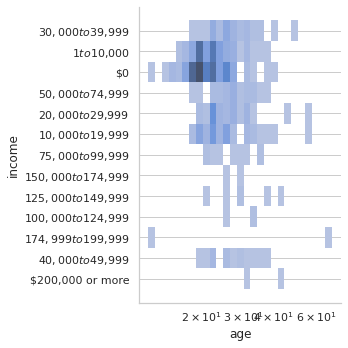

In [57]:
sns.displot(suicide_risk, x="age", y="income", log_scale=(True, False))

,time,gender,sexuallity,age,income,race,bodyweight,virgin,prostitution_legal,pay_for_sex,friends,social_fear,depressed,what_help_from_others,attempt_suicide,employment,job_title,edu_level,improve_yourself_how
0,5/17/2016 20:04:18,Male,Straight,35,"$30,000 to $39,999",White non-Hispanic,Normal weight,Yes,No,No,0.0,Yes,Yes,"wingman/wingwoman, Set me up with a date",Yes,Employed for wages,mechanical drafter,Associate degree,None
1,5/17/2016 20:04:30,Male,Bisexual,21,"$1 to $10,000",White non-Hispanic,Underweight,Yes,No,No,0.0,Yes,Yes,"wingman/wingwoman, Set me up with a date, date...",No,Out of work and looking for work,-,"Some college, no degree",join clubs/socual clubs/meet ups
2,5/17/2016 20:04:58,Male,Straight,22,$0,White non-Hispanic,Overweight,Yes,No,No,10.0,Yes,Yes,I don't want help,No,Out of work but not currently looking for work,unemployed,"Some college, no degree",Other exercise
3,5/17/2016 20:08:01,Male,Straight,19,"$1 to $10,000",White non-Hispanic,Overweight,Yes,Yes,No,8.0,Yes,Yes,date coaching,No,A student,student,"Some college, no degree",Joined a gym/go to the gym
4,5/17/2016 20:08:04,Male,Straight,23,"$30,000 to $39,999",White non-Hispanic,Overweight,No,No,Yes and I have,10.0,No,Yes,I don't want help,No,Employed for wages,Factory worker,"High school graduate, diploma or the equivalen...",None


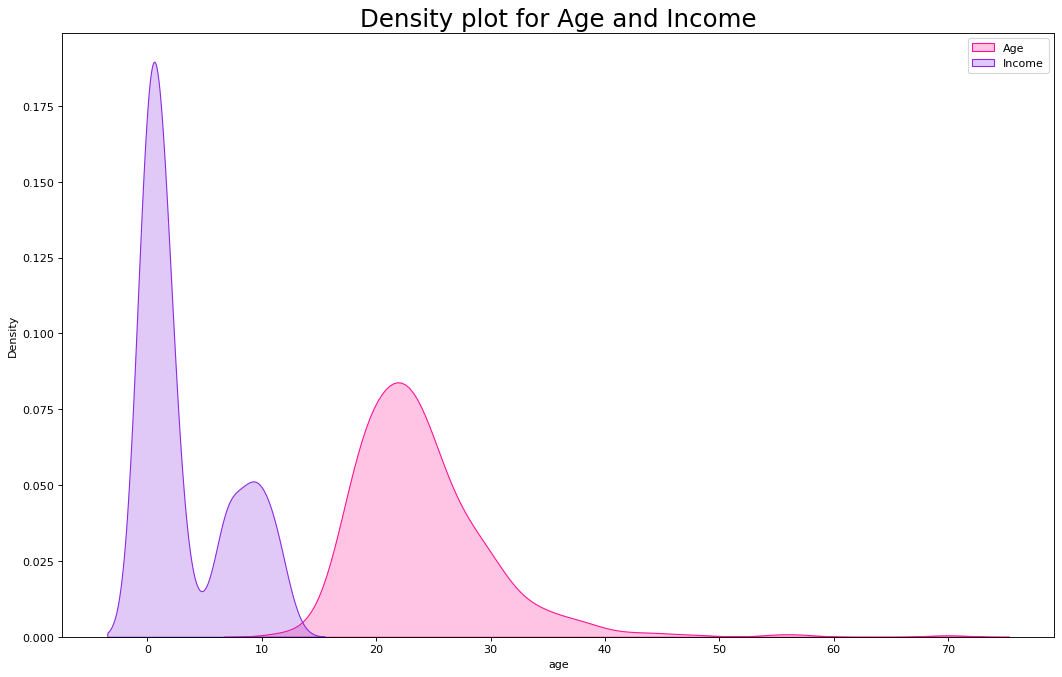

In [62]:
# Density Plot

plt.figure(figsize = (16,10), dpi = 80)
sns.kdeplot(suicide_risk['age'], color="deeppink", shade = True, label = 'Age')
sns.kdeplot(suicide_risk['income'], color="blueviolet", shade = True, label = 'Income')

plt.title('Density plot for Age and Income', fontsize = 22)
plt.legend()
plt.show()

In [63]:
suicide_risk['income']

0       9
1       1
2       0
3       1
4       9
       ..
464     2
465     9
466     1
467     0
468    10
Name: income, Length: 457, dtype: int64

In [0]:
plt.figure(figsize=(16,10), dpi= 80)
fig, axes = joypy.joyplot(mpg, column=['hwy', 'cty'], by="class", ylim='own', figsize=(14,10))

# Decoration
plt.title('Joy Plot of City and Highway Mileage by Class', fontsize=22)
plt.show()

# SVC



In [4]:
#SVC

#Libraries
import sklearn
from sklearn.svm import SVC
from sklearn import svm

#Drop Time
suicide_risk.drop("time", axis = 1, inplace = True)
suicide_risk.head()

#Target
target = suicide_risk["attempt_suicide"]

input_columns = suicide_risk.loc[:, suicide_risk.columns != "attempt_suicide"]

#Split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(input_columns, target, test_size=0.2)

X = x_train
y = y_train
my_model = svm.SVC()

In [5]:
pd.get_dummies(suicide_risk, columns=["gender"]).head()

,sexuallity,age,income,race,bodyweight,virgin,prostitution_legal,pay_for_sex,friends,social_fear,...,what_help_from_others,attempt_suicide,employment,job_title,edu_level,improve_yourself_how,gender_Female,gender_Male,gender_Transgender female,gender_Transgender male
0,Straight,35,"$30,000 to $39,999",White non-Hispanic,Normal weight,Yes,No,No,0.0,Yes,...,"wingman/wingwoman, Set me up with a date",Yes,Employed for wages,mechanical drafter,Associate degree,None,0,1,0,0
1,Bisexual,21,"$1 to $10,000",White non-Hispanic,Underweight,Yes,No,No,0.0,Yes,...,"wingman/wingwoman, Set me up with a date, date...",No,Out of work and looking for work,-,"Some college, no degree",join clubs/socual clubs/meet ups,0,1,0,0
2,Straight,22,$0,White non-Hispanic,Overweight,Yes,No,No,10.0,Yes,...,I don't want help,No,Out of work but not currently looking for work,unemployed,"Some college, no degree",Other exercise,0,1,0,0
3,Straight,19,"$1 to $10,000",White non-Hispanic,Overweight,Yes,Yes,No,8.0,Yes,...,date coaching,No,A student,student,"Some college, no degree",Joined a gym/go to the gym,0,1,0,0
4,Straight,23,"$30,000 to $39,999",White non-Hispanic,Overweight,No,No,Yes and I have,10.0,No,...,I don't want help,No,Employed for wages,Factory worker,"High school graduate, diploma or the equivalen...",None,0,1,0,0


In [6]:
suicide_risk.dtypes

gender                    object
sexuallity                object
age                        int64
income                    object
race                      object
bodyweight                object
virgin                    object
prostitution_legal        object
pay_for_sex               object
friends                  float64
social_fear               object
depressed                 object
what_help_from_others     object
attempt_suicide           object
employment                object
job_title                 object
edu_level                 object
improve_yourself_how      object
dtype: object

In [7]:
#Label Encoding

import pandas as pd
import numpy as np
suicide_risk.isna().sum()

gender                    0
sexuallity                0
age                       0
income                    0
race                      0
bodyweight                0
virgin                    0
prostitution_legal        0
pay_for_sex               0
friends                   0
social_fear               0
depressed                 0
what_help_from_others     0
attempt_suicide           0
employment                0
job_title                12
edu_level                 0
improve_yourself_how      0
dtype: int64

In [8]:
suicide_risk = suicide_risk.dropna()
suicide_risk.isna().sum()

gender                   0
sexuallity               0
age                      0
income                   0
race                     0
bodyweight               0
virgin                   0
prostitution_legal       0
pay_for_sex              0
friends                  0
social_fear              0
depressed                0
what_help_from_others    0
attempt_suicide          0
employment               0
job_title                0
edu_level                0
improve_yourself_how     0
dtype: int64

In [9]:
suicide_risk_numeric = suicide_risk.select_dtypes(exclude=np.number).columns

In [10]:
suicide_risk[suicide_risk_numeric].head()

,gender,sexuallity,income,race,bodyweight,virgin,prostitution_legal,pay_for_sex,social_fear,depressed,what_help_from_others,attempt_suicide,employment,job_title,edu_level,improve_yourself_how
0,Male,Straight,"$30,000 to $39,999",White non-Hispanic,Normal weight,Yes,No,No,Yes,Yes,"wingman/wingwoman, Set me up with a date",Yes,Employed for wages,mechanical drafter,Associate degree,None
1,Male,Bisexual,"$1 to $10,000",White non-Hispanic,Underweight,Yes,No,No,Yes,Yes,"wingman/wingwoman, Set me up with a date, date...",No,Out of work and looking for work,-,"Some college, no degree",join clubs/socual clubs/meet ups
2,Male,Straight,$0,White non-Hispanic,Overweight,Yes,No,No,Yes,Yes,I don't want help,No,Out of work but not currently looking for work,unemployed,"Some college, no degree",Other exercise
3,Male,Straight,"$1 to $10,000",White non-Hispanic,Overweight,Yes,Yes,No,Yes,Yes,date coaching,No,A student,student,"Some college, no degree",Joined a gym/go to the gym
4,Male,Straight,"$30,000 to $39,999",White non-Hispanic,Overweight,No,No,Yes and I have,No,Yes,I don't want help,No,Employed for wages,Factory worker,"High school graduate, diploma or the equivalen...",None


In [11]:
suicide_risk_numeric

Index(['gender', 'sexuallity', 'income', 'race', 'bodyweight', 'virgin',
       'prostitution_legal', 'pay_for_sex', 'social_fear', 'depressed',
       'what_help_from_others', 'attempt_suicide', 'employment', 'job_title',
       'edu_level', 'improve_yourself_how'],
      dtype='object')

In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for i in suicide_risk_numeric:
    suicide_risk[i] = label_encoder.fit_transform(suicide_risk[i])
print("Encoded data")
suicide_risk.head()

Encoded data


,gender,sexuallity,age,income,race,bodyweight,virgin,prostitution_legal,pay_for_sex,friends,social_fear,depressed,what_help_from_others,attempt_suicide,employment,job_title,edu_level,improve_yourself_how
0,1,2,35,9,16,0,1,0,0,0.0,1,1,36,1,2,242,0,32
1,1,0,21,1,16,3,1,0,0,0.0,1,1,40,0,4,4,6,57
2,1,2,22,0,16,2,1,0,0,10.0,1,1,5,0,5,271,6,35
3,1,2,19,1,16,2,1,1,0,8.0,1,1,26,0,1,262,6,14
4,1,2,23,9,16,2,0,0,1,10.0,0,1,5,0,2,61,3,32


In [13]:
suicide_risk["attempt_suicide"].value_counts()

0    372
1     85
Name: attempt_suicide, dtype: int64

In [14]:
#Target
target = suicide_risk["attempt_suicide"]

input_columns = suicide_risk.loc[:, suicide_risk.columns != "attempt_suicide"]

#Split
from sklearn.model_selection import train_test_split

#Train
x_train, x_test, y_train, y_test = train_test_split(input_columns, target, test_size=0.2)

In [15]:
#Fit Data

my_model.fit(x_train, y_train)

SVC()

In [16]:
#Predictions

y_hat = my_model.predict(x_test)

In [17]:
y_hat

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [18]:
np.array(y_test)

array([0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0])

In [19]:
#MSE

total_squared_error = (np.sum((y_test - y_hat)**2))
mean_squared_error = total_squared_error/len(y_test)
print(mean_squared_error)

0.11956521739130435


<AxesSubplot:>

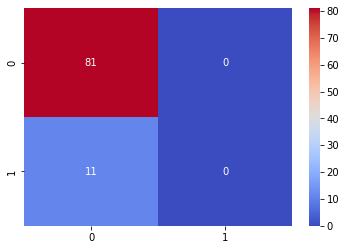

In [20]:
#Confusion Matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_hat), annot=True, fmt='g', cmap = 'coolwarm')

In [0]:
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
happiness_report(connected = True)
data = dict(type = 'choropleth',
locations = ['Netherlands', 'Brazil', 'Ireland'],
    locationmode = 'World',

In [0]:
suicide_risk.head()

In [0]:
#suicide_risk = suicide_risk.replace({'gender':  {'Transgender male': 3, 'Transgender female': 2, 'Male': 1, 'Female': 0}})
#suicide_risk = suicide_risk.replace({'race': {'other': 3, 'Hispanic': 2, 'Asian': 1, 'White non-Hispanic': 0}})
#suicide_risk = suicide_risk.replace({'sexuallity':  {'Gay/Lesbian': 2, 'Bisexual': 1, 'Straight': 0}})
#suicide_risk = suicide_risk.replace({'virgin':  {'Yes': 1, 'No': 0}})
#suicide_risk = suicide_risk.replace({'prostitution_legal':  {'Yes': 1, 'No': 0}})
#suicide_risk = suicide_risk.replace({'virgin':  {'Yes': 1, 'No': 0}})

In [0]:
suicide_risk['race'].value_counts()

In [0]:
suicide_risk_testing = pd.read_csv("foreveralone.csv")

In [0]:
races_df = pd.DataFrame(suicide_risk["race"].index)

In [0]:
races_df

In [0]:
race_freq

In [0]:
#le = LabelEncoder()
#new_colm = fit_transform(suicide_risk["race"])

try_df =pd.read_csv("foreveralone.csv")
race_freq = (try_df['race'].value_counts())/try_df.shape[0]
other_races = race_freq.quantile(q=0.50)
less_freq_race = race_freq[race_freq<=0.006397]
try_df.loc[try_df['race'].isin(less_freq_race.index.tolist()), "race"] = "other"
#suicide_risk_testing['race'].head(20)

In [0]:
race_freq

In [0]:
other_races

In [0]:
try_df.race.value_counts()

In [0]:
suicide_risk_testing["race"].value_counts()

In [0]:

suicide_risk_testing.head(30)

In [0]:
suicide_risk_test.head(30)

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset('iris')

sns.jointplot(x=df["sepal_length"], y=df["sepal_width"], kind='Deppresion')
sns.jointplot(x=df["sepal_length"], y=df["sepal_width"], kind='Friends')
sns.jointplot(x=df["sepal_length"], y=df["sepal_width"], kind='Weight')
plt.show()
# Then you can pass arguments to each type:
sns.jointplot(x=df["sepal_length"], y=df["sepal_width"], kind='scatter', s=200, color='m', edgecolor="skyblue", linewidth=2)
 
# Custom the color
sns.set(style="white", color_codes=True)
sns.jointplot(x=df["sepal_length"], y=df["sepal_width"], kind='Suicide_prevention', color="skyblue")

plt.show()

ValueError: `kind` must be one of ['scatter', 'hist', 'hex', 'kde', 'reg', 'resid'], but Deppresion was passed.`